## Importing the libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Loading the dataset

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## converting the object data type to string data type for applying label encoding

In [5]:
data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('string')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   string 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   string 
 5   region    1338 non-null   string 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), string(3)
memory usage: 73.3 KB


In [7]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Label encoding the categorical data using map() function

In [8]:
data['sex'] = data['sex'].map({'female':0, 'male':1})
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})
data['region'] = data['region'].map({'northwest':0, 'northeast':1, 'southwest':2, 'southeast':3})

In [9]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,10600.54830
1334,18,0,31.920,0,0,1,2205.98080
1335,18,0,36.850,0,0,3,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


## Check null values

In [10]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## check boxplot to see the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x79147f339600>,
 'caps': [<matplotlib.lines.Line2D at 0x79147f33b3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79147f338280>],
 'medians': [<matplotlib.lines.Line2D at 0x79147f339780>],
 'fliers': [<matplotlib.lines.Line2D at 0x79147f339a20>],
 'means': []}

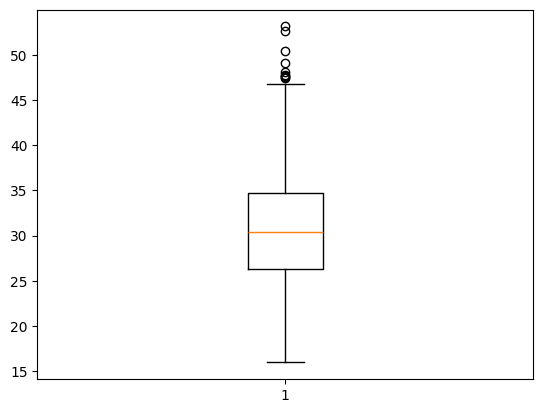

In [11]:
plt.boxplot(data['bmi'])

## Removing outliers - BMI greater than 47 is unusual

In [12]:
data = data.drop(data[data.bmi > 47].index)

In [13]:
data['bmi'].max()

46.75

## Train Test Data

In [14]:
X = data.drop(['charges'], axis = 1)
y = data['charges']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Standardization of the data

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
x_train_scaled

array([[ 1.12560968,  0.96942304,  0.3780031 , -0.88947791, -0.50792535,
        -1.35564749],
       [ 0.70075831,  0.96942304, -0.04020807, -0.88947791, -0.50792535,
         0.41468824],
       [ 0.20509837,  0.96942304,  0.1211623 , -0.88947791, -0.50792535,
        -1.35564749],
       ...,
       [-0.9986472 , -1.0315414 , -1.64546309, -0.05935059, -0.50792535,
         0.41468824],
       [-1.49430714,  0.96942304,  1.14092167, -0.88947791, -0.50792535,
         1.2998561 ],
       [-0.78622151,  0.96942304,  0.55458115, -0.88947791, -0.50792535,
        -1.35564749]])

In [31]:
x_test_scaled

array([[-1.42349857, -1.0315414 , -1.35567232, -0.88947791, -0.50792535,
        -1.35564749],
       [ 1.4796525 ,  0.96942304, -0.32830911, -0.88947791, -0.50792535,
        -0.47047963],
       [-1.49430714,  0.96942304, -0.85804326, -0.88947791, -0.50792535,
        -0.47047963],
       ...,
       [ 1.05480112,  0.96942304,  0.1794584 , -0.88947791, -0.50792535,
         0.41468824],
       [-0.4321787 , -1.0315414 , -0.38322573, -0.05935059, -0.50792535,
         1.2998561 ],
       [ 0.77156687,  0.96942304, -0.88507914, -0.88947791, -0.50792535,
         1.2998561 ]])

## Models before Standardization

## Linear Regression

In [16]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)


LinearRegression()

In [17]:
y_pred_lr = model_lr.predict(x_test)

In [18]:
model_lr.score(x_train, y_train)

0.7445938446831092

In [19]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r_squared = r2_score(y_test, y_pred_lr)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE)", mae)
print("Mean Squared Error (MSE)", mse)
print("R-squared (R²)", r_squared)
print("Root Mean Squared Error (RMSE)", rmse)


Mean Absolute Error (MAE) 4070.8620538470873
Mean Squared Error (MSE) 34391097.27443514
R-squared (R²) 0.7678385458611793
Root Mean Squared Error (RMSE) 5864.392319280416


## SVM

In [44]:
model_svm = SVR()
model_svm.fit(x_train, y_train)

SVR()

In [45]:
y_pred_svm = model_svm.predict(x_test)

In [46]:
print(r2_score(y_test, y_pred_svm))

-0.10054261457503655


In [47]:
# Calculate evaluation metrics
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r_squared_svm = r2_score(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

# Print the evaluation metrics
print("Mean Absolute Error (MAE)", mae_svm)
print("Mean Squared Error (MSE)", mse_svm)
print("R-squared (R2)", r_squared_svm)
print("Root Mean Squared Error (RMSE)", rmse_svm)


Mean Absolute Error (MAE) 8314.793507245135
Mean Squared Error (MSE) 163028217.81035012
R-squared (R2) -0.10054261457503655
Root Mean Squared Error (RMSE) 12768.25038172224


## Random Forest

In [24]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)


RandomForestRegressor()

In [25]:
y_pred_rf = model_rf.predict(x_test)

In [26]:
# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Print the evaluation metrics
print("Mean Absolute Error (MAE)", mae_rf)
print("Mean Squared Error (MSE)", mse_rf)
print("R-squared (R²)", r_squared_rf)
print("Root Mean Squared Error (RMSE)", rmse_rf)


Mean Absolute Error (MAE) 2650.027609582356
Mean Squared Error (MSE) 25252624.233800985
R-squared (R²) 0.8295289645411074
Root Mean Squared Error (RMSE) 5025.198924798996


Random Forest has good predictability compared to Linear Regression and Support Vector Machine

## Models after Standardization

## Linear Regression

In [32]:
model_lr_new = LinearRegression()
model_lr_new.fit(x_train_scaled, y_train)


LinearRegression()

In [33]:
y_pred_lr_new = model_lr_new.predict(x_test_scaled)

In [34]:
model_lr_new.score(x_train_scaled, y_train)

0.7445938446831093

In [35]:
# Calculate evaluation metrics
mae_new = mean_absolute_error(y_test, y_pred_lr_new)
mse_new = mean_squared_error(y_test, y_pred_lr_new)
r_squared_new = r2_score(y_test, y_pred_lr_new)
rmse_new = np.sqrt(mse_new)

# Print the evaluation metrics
print("Mean Absolute Error (MAE)", mae_new)
print("Mean Squared Error (MSE)", mse_new)
print("R-squared (R²)", r_squared_new)
print("Root Mean Squared Error (RMSE)", rmse_new)


Mean Absolute Error (MAE) 4070.862053847086
Mean Squared Error (MSE) 34391097.27443514
R-squared (R²) 0.7678385458611793
Root Mean Squared Error (RMSE) 5864.392319280416


## SVM

In [36]:
model_svm_new = SVR()
model_svm_new.fit(x_train_scaled, y_train)

SVR()

In [37]:
y_pred_svm_new = model_svm_new.predict(x_test_scaled)

In [38]:
print(r2_score(y_test, y_pred_svm_new))

-0.09643850430312573


In [39]:
# Calculate evaluation metrics
mae_svm_new = mean_absolute_error(y_test, y_pred_svm_new)
mse_svm_new = mean_squared_error(y_test, y_pred_svm_new)
r_squared_svm_new = r2_score(y_test, y_pred_svm_new)
rmse_svm_new = np.sqrt(mse_svm_new)

# Print the evaluation metrics
print("Mean Absolute Error (MAE)", mae_svm_new)
print("Mean Squared Error (MSE)", mse_svm_new)
print("R-squared (R2)", r_squared_svm_new)
print("Root Mean Squared Error (RMSE)", rmse_svm_new)


Mean Absolute Error (MAE) 8321.674606952825
Mean Squared Error (MSE) 162420257.90542164
R-squared (R2) -0.09643850430312573
Root Mean Squared Error (RMSE) 12744.420657896602


## Random Forest

In [41]:
model_rf_new = RandomForestRegressor()
model_rf_new.fit(x_train_scaled, y_train)


RandomForestRegressor()

In [42]:
y_pred_rf_new = model_rf_new.predict(x_test_scaled)

In [43]:
# Calculate evaluation metrics
mae_rf_new = mean_absolute_error(y_test, y_pred_rf_new)
mse_rf_new = mean_squared_error(y_test, y_pred_rf_new)
r_squared_rf_new = r2_score(y_test, y_pred_rf_new)
rmse_rf_new = np.sqrt(mse_rf_new)

# Print the evaluation metrics
print("Mean Absolute Error (MAE)", mae_rf_new)
print("Mean Squared Error (MSE)", mse_rf_new)
print("R-squared (R²)", r_squared_rf_new)
print("Root Mean Squared Error (RMSE)", rmse_rf_new)


Mean Absolute Error (MAE) 2631.2151196847803
Mean Squared Error (MSE) 25319988.821039263
R-squared (R²) 0.8290742113703696
Root Mean Squared Error (RMSE) 5031.89713935403


After standardization, there is some improvement in SVM model's performance compared to the model before the standardization. However the performance is still so poor. Random Forest model's MAE and R-squared value are reduced a little bit but at the same time its RMSE increased a little bit after standardization.

Overall, the Random Forest model performance is good compared to Linear Regression and SVM both before and after standardization.